# Introduction to the Survival Analysis

This is a short introduction to how to use statistical methods with survival analysis with TCGA breast cancer data.


## Methods


> **See Also**: For a more in-depth tour about statistical methods you can visit the following links:


## Data

- For this tutorial we will use two techniques to divide data into training and validation with TCGA data:
    - Bootstrap resampling
    - Cross validation
    -- k-folds
    -- Stratified k-folds
- The data we are going to use is right censored which means not all patients deceased

> For **python** libraries:
> - lifelines


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import numpy as np

Load data from CSV file with 1083 breast cancer patients from TCGA

In [2]:
df = pd.read_csv('Dataset/BRCA_TCGA_Tutorial.csv')
df.head()
print(len(df))

1083


In [3]:
# Look at the categorical and numerical variables
summary_categorical = []
for column in df.columns:
  if df[column].dtype == object:
    summary_categorical.append(column)
    print(df[column].value_counts())
    print(f"----------------------------------")

summary_numerical = []
for column in df.columns:
  if df[column].dtype != object:
    print(f"{column} : Minimum: {min((df[column].unique()))}, Maximum: {max((df[column].unique()))} ")
    summary_numerical.append(column)
    print(f"----------------------------------")

TCGA-A2-A0CO    1
TCGA-A7-A26J    1
TCGA-E9-A1RG    1
TCGA-LD-A66U    1
TCGA-A7-A4SE    1
               ..
TCGA-BH-A0BL    1
TCGA-A2-A0ER    1
TCGA-AC-A2FO    1
TCGA-BH-A0BZ    1
TCGA-B6-A0X0    1
Name: ID, Length: 1083, dtype: int64
----------------------------------
STAGE IIA     354
STAGE IIB     255
STAGE IIIA    155
STAGE I        89
STAGE IA       86
STAGE IIIC     64
STAGE IIIB     28
STAGE IV       19
STAGE X        14
STAGE II        6
STAGE IB        6
STAGE III       2
Name: stage, dtype: int64
----------------------------------
Breast Invasive Ductal Carcinoma            779
Breast Invasive Lobular Carcinoma           201
Breast Invasive Carcinoma (NOS)              77
Breast Invasive Mixed Mucinous Carcinoma     17
Metaplastic Breast Cancer                     8
Invasive Breast Carcinoma                     1
Name: cancer_type_detailed, dtype: int64
----------------------------------
0:DiseaseFree            858
1:Recurred/Progressed     84
Name: Disease Free Status, dtyp

In [4]:
# Convert all string categorical variables into integer labels
encoder = LabelEncoder()
for column in df.columns:
  if df[column].dtype == object:
    df[column] = encoder.fit_transform(df[column])

# Kaplan-Meier Estimator

In [5]:
# here to specify which event we will make our study about OS or PFI etc.
event = 'OS'
time = 'OS Time'
# remove the rows with NaNs
print(len(df))
df_surv = df.dropna(subset=[event, time])
print(len(df_surv))

1083
1081


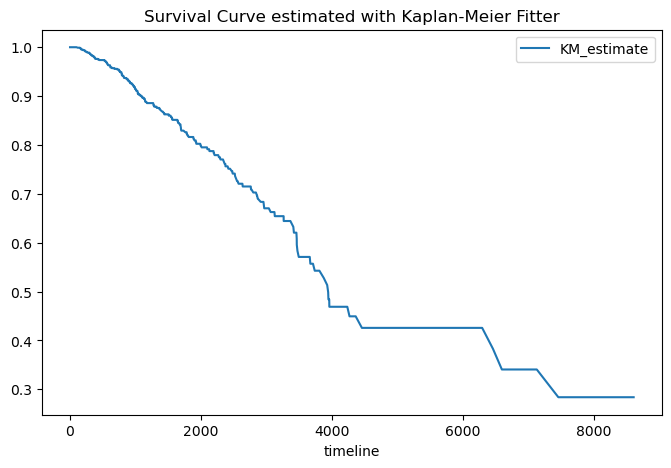

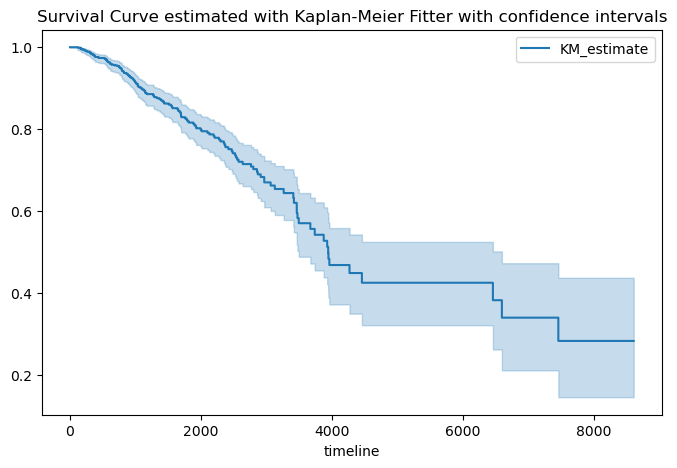

In [6]:
kmf = KaplanMeierFitter()
kmf.fit(durations=df_surv[time], event_observed=df_surv[event])

kmf.survival_function_.plot(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

kmf.plot_survival_function(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter with confidence intervals')
plt.show()


In [7]:
# here is to show the KM estimated survival scores based on OS
print(kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
1.0          1.000000
5.0          1.000000
7.0          1.000000
8.0          1.000000
...               ...
7777.0       0.283794
8008.0       0.283794
8391.0       0.283794
8556.0       0.283794
8605.0       0.283794

[823 rows x 1 columns]


## Survival Function of Different Groups

1    389
0    367
2    190
3     91
4     40
5      4
Name: Immune Subtype, dtype: int64


<AxesSubplot:>

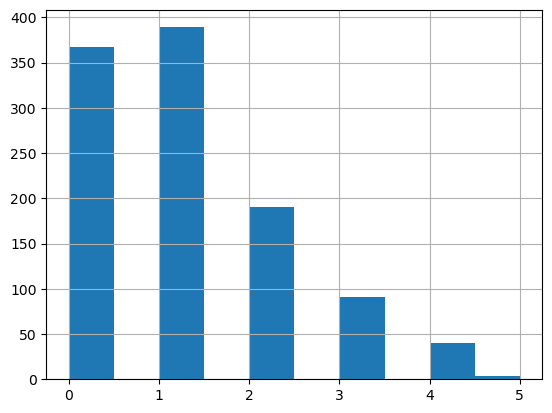

In [8]:
print(df_surv['Immune Subtype'].value_counts())
df_surv['Immune Subtype'].hist()

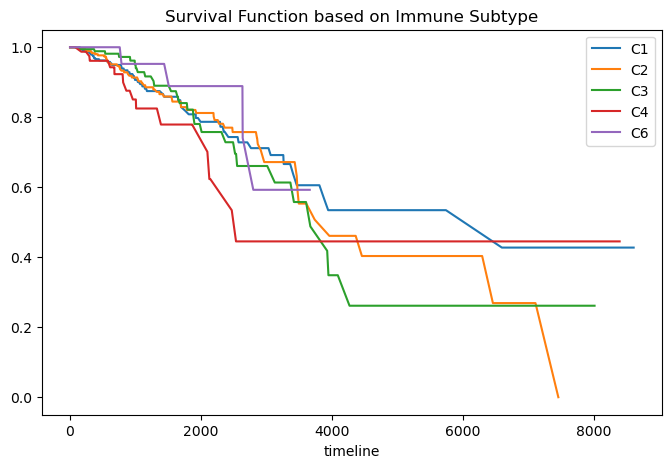

In [9]:
Patient_C1 = (df_surv['Immune Subtype'] == 0)
Patient_C2 = (df_surv['Immune Subtype'] == 1)
Patient_C3 = (df_surv['Immune Subtype'] == 2)
Patient_C4 = (df_surv['Immune Subtype'] == 3)
Patient_C6 = (df_surv['Immune Subtype'] == 4)

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df_surv[Patient_C1][time],
        event_observed=df_surv[Patient_C1][event],
        label='C1')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_C2][time],
        event_observed=df_surv[Patient_C2][event],
        label='C2')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_C3][time],
        event_observed=df_surv[Patient_C3][event],
        label='C3')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_C4][time],
        event_observed=df_surv[Patient_C4][event],
        label='C4')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_C6][time],
        event_observed=df_surv[Patient_C6][event],
        label='C6')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on Immune Subtype')
plt.show()


<AxesSubplot:>

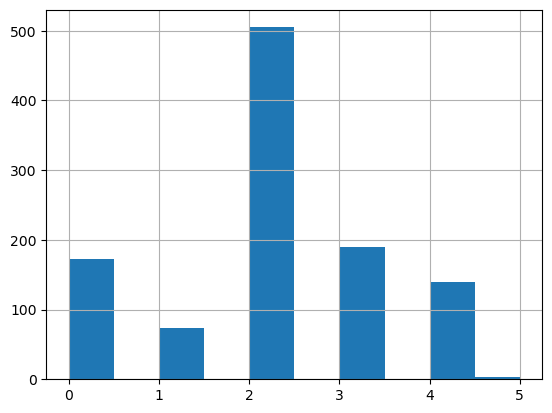

In [10]:
df['TCGA Subtype'].hist()

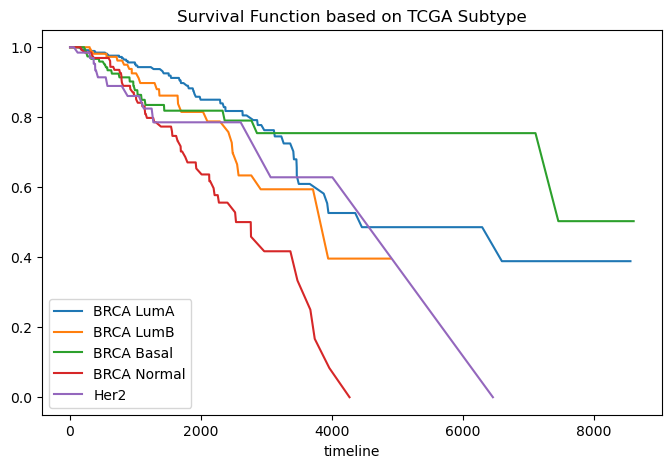

In [11]:
Patient_BRCA_LumA = (df_surv['TCGA Subtype'] == 2)
Patient_BRCA_LumB = (df_surv['TCGA Subtype'] == 3)
Patient_BRCA_Basal = (df_surv['TCGA Subtype'] == 0)
Patient_BRCA_Normal = (df_surv['TCGA Subtype'] == 4)
Patient_Her2 = (df_surv['TCGA Subtype'] == 1)


ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations=df_surv[Patient_BRCA_LumA][time],
        event_observed=df_surv[Patient_BRCA_LumA][event],
        label='BRCA LumA')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_BRCA_LumB][time],
        event_observed=df_surv[Patient_BRCA_LumB][event],
        label='BRCA LumB')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_BRCA_Basal][time],
        event_observed=df_surv[Patient_BRCA_Basal][event],
        label='BRCA Basal')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_BRCA_Normal][time],
        event_observed=df_surv[Patient_BRCA_Normal][event],
        label='BRCA Normal')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_surv[Patient_Her2][time],
        event_observed=df_surv[Patient_Her2][event],
        label='Her2')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)
plt.title('Survival Function based on TCGA Subtype')
plt.show()


1083
939
The threshold value: 1.307444488


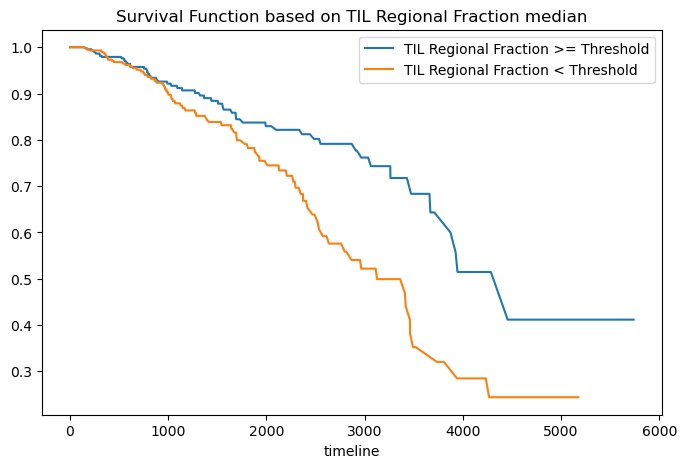

In [12]:


# to do the survival analysis with continuous variable
# select a threshold based on different methods (mean, median, mode etc)
feature = 'TIL Regional Fraction'
df_variable = df.copy()

print(len(df_variable))
df_variable = df_variable.dropna(subset=[feature,time,event])
threshold = df_variable[feature].median()
print(len(df_variable))

# to specify the time maximum range
df_variable = df_variable[df_variable[time]<6000]

print("The threshold value: {:.9f}".format(threshold))

Patient_group_1 = (df_variable[feature] >= threshold)
Patient_group_2 = (df_variable[feature] < threshold)

ax = plt.subplot()
kmf = KaplanMeierFitter()


kmf.fit(durations=df_variable[Patient_group_1][time],
        event_observed=df_variable[Patient_group_1][event],
        label=feature+' >= Threshold')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

kmf.fit(durations=df_variable[Patient_group_2][time],
        event_observed=df_variable[Patient_group_2][event],
        label=feature+' < Threshold')
kmf.survival_function_.plot(figsize=(8,5), ax=ax)

plt.title('Survival Function based on '+ feature+' median')
plt.show()


## Log-rank Test

In [13]:
results = logrank_test(df_surv[Patient_BRCA_LumA][time], df_surv[Patient_Her2][time],
                       event_observed_A=df_surv[Patient_BRCA_LumA][event], event_observed_B=df_surv[Patient_Her2][event])

print("p-value:{:.9f}".format(results.p_value))
print("test statistic:{:.2f}".format(results.test_statistic))


p-value:0.035691739
test statistic:4.41


In [14]:
results = logrank_test(df_surv[Patient_BRCA_Basal][time], df_surv[Patient_BRCA_Normal][time],
                       event_observed_A=df_surv[Patient_BRCA_Basal][event], event_observed_B=df_surv[Patient_BRCA_Normal][event])

print("p-value:{:.9f}".format(results.p_value))
print("test statistic:{:.2f}".format(results.test_statistic))

p-value:0.000638935
test statistic:11.66


## Cox Proportional-Hazards Model
A negative coefficient means that an increase in the value of the corresponding covariate is associated with a decreased hazard rate, implying a lower risk of experiencing the event. The Concordance Index evaluates the accuracy of the ordering of predicted time with random predictions <= 0.5 and perfect concordance of 1.0.


In [15]:
# Prepare the dataframe for fitting
columns_selected = ['Immune Subtype',
                    'TCGA Subtype',
                    'age',
                    'stage',
                    'Oncotree Code',
                    'tumour_stage',
                    'TIL Regional Fraction', time, event]
df_cox = df.copy()
df_cox = df_cox[columns_selected]
print(len(df_cox))
#clean the data from NaN values
df_cox = df_cox.dropna(subset=columns_selected)
print(len(df_cox))


1083
939


In [16]:
from lifelines import CoxPHFitter

#initialize a fitter
coxph = CoxPHFitter()

# Fit Cox Proportional Hazards model on the selected data
coxph.fit(df_cox,
          duration_col=time,
          event_col=event)

<lifelines.CoxPHFitter: fitted with 939 total observations, 805 right-censored observations>

In [17]:
# Print Cox Proportional Hazards model Summary
# coxph.print_summary()
# Print Cox Proportional Hazards model coefficient for each covariate
print(pd.DataFrame({'Covariate': df_cox.drop([time, event], axis=1).columns, 'Coefficient': coxph.summary['coef'].values}))
print("Concordance:{:.2f}".format(coxph.concordance_index_ ))

               Covariate  Coefficient
0         Immune Subtype    -0.027919
1           TCGA Subtype     0.221166
2                    age     0.036634
3                  stage     0.246829
4          Oncotree Code     0.017626
5           tumour_stage    -0.063134
6  TIL Regional Fraction    -0.009834
Concordance:0.75


<AxesSubplot:xlabel='log(HR) (95% CI)'>

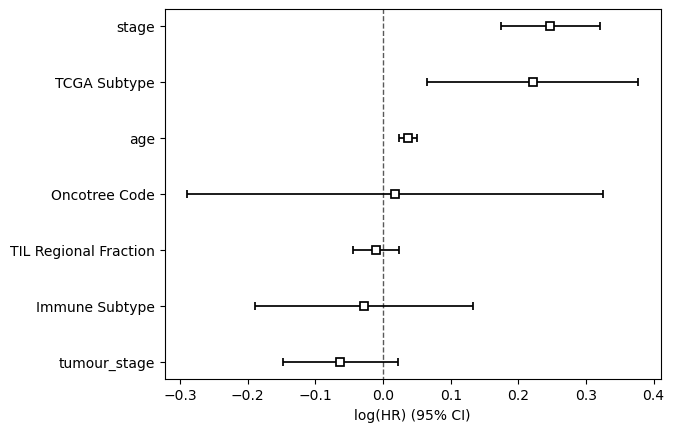

In [18]:
coxph.plot()

# 1. Bootstrap Resampling

In [19]:
n_bootstrap = 10
coefficients = []
concordances = []

# Loop through bootstrap runs
for i in range(n_bootstrap):
    # Bootstrap sampling with replacement
    bootstrap_sample = df_cox.sample(frac=1.0, replace=True)

    # Fit Cox Proportional Hazards model
    cph = CoxPHFitter()
    cph.fit(bootstrap_sample, duration_col=time, event_col=event)

    # Store coefficients from the current run
    coefficients.append(cph.summary['coef'].values)
    concordances.append(cph.concordance_index_)

# Calculate the average coefficients
average_coefficients = np.mean(coefficients, axis=0)
average_concordance = np.mean(concordances, axis=0)

# Display the average coefficients
print("Average Coefficients:")
print(pd.DataFrame({'Covariate': df_cox.drop([time, event], axis=1).columns, 'Coefficient': average_coefficients}))
print("Average concordances:")
print(average_concordance)
print("Standard deviation of concordances:")
print(np.std(average_concordance))

Average Coefficients:
               Covariate  Coefficient
0         Immune Subtype    -0.065665
1           TCGA Subtype     0.265509
2                    age     0.036639
3                  stage     0.255195
4          Oncotree Code     0.113504
5           tumour_stage    -0.049289
6  TIL Regional Fraction    -0.011291
Average concordances:
0.48272465826624245
Standard deviation of concordances:
0.0


# Cross-validation (Stratified k-folds)

In [20]:
from sklearn.model_selection import StratifiedKFold
cph_scores = []
cph = CoxPHFitter()
skf = StratifiedKFold(n_splits=10, shuffle=True)

#loop over 10 folds which stratified based on the event
for fold, (train_idx, test_idx) in enumerate(skf.split(df_cox, df_cox[event])):
        #locate the indices of train and test in the original dataset with the selected covariances
        train_set = df_cox.iloc[train_idx, :]
        test_set = df_cox.iloc[test_idx, :]

        # Fit Cox Proportional Hazards model
        cph.fit(train_set, duration_col=time, event_col=event)

        #do scoring with concordance index as a return value on test data using the trained model
        cph_scores.append(cph.score(test_set, scoring_method='concordance_index'))

print(np.mean(cph_scores), np.std(cph_scores))


0.737353644397012 0.06442910710521045
